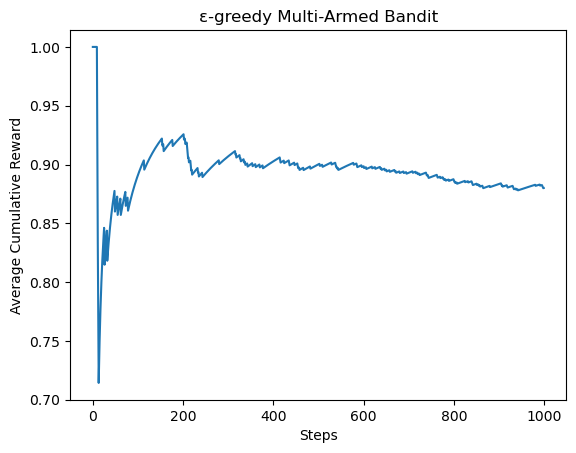

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class MultiArmedBandit:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        self.true_means = np.random.rand(num_arms)
        self.q_values = np.zeros(num_arms)
        self.action_counts = np.zeros(num_arms)

    def choose_action(self, epsilon):
        if np.random.rand() < epsilon:
            # Exploration: Choose a random arm
            return np.random.choice(self.num_arms)
        else:
            # Exploitation: Choose the arm with the highest estimated value
            return np.argmax(self.q_values)

    def update_q_values(self, action, reward):
        # Update Q-values using incremental formula
        self.action_counts[action] += 1
        self.q_values[action] += (reward - self.q_values[action]) / self.action_counts[action]

def run_experiment(num_arms, num_steps, epsilon):
    bandit = MultiArmedBandit(num_arms)
    rewards = []

    for step in range(num_steps):
        action = bandit.choose_action(epsilon)
        reward = np.random.binomial(1, bandit.true_means[action])
        bandit.update_q_values(action, reward)
        rewards.append(reward)

    return rewards

def plot_cumulative_rewards(rewards):
    cumulative_rewards = np.cumsum(rewards)
    average_rewards = cumulative_rewards / np.arange(1, len(rewards) + 1)

    plt.plot(average_rewards)
    plt.xlabel('Steps')
    plt.ylabel('Average Cumulative Reward')
    plt.title('ε-greedy Multi-Armed Bandit')
    plt.show()

if __name__ == "__main__":
    num_arms = 5
    num_steps = 1000
    epsilon = 0.1

    rewards = run_experiment(num_arms, num_steps, epsilon)
    plot_cumulative_rewards(rewards)